In [1]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import timeit

Построим зависимость времени выполнения от количества потоков при фиксированном размере матриц

In [2]:
A_rows = 1024
A_cols = 1024
B_cols = 1024

A = np.random.random((A_rows, A_cols))
B = np.random.random((A_cols, B_cols))

threads = list(k + 1 for k in range(6))

In [3]:
@nb.njit('float64[:,:](float64[:,:],float64[:,:])', parallel = True, nogil = False)
def mat_mul_parallel(mat_1, mat_2):
    row_1, col_1 = mat_1.shape
    _, col_2 = mat_2.shape
    mat_3 = np.empty((row_1, col_2), dtype = np.float64)
    for i in nb.prange(row_1):
        for j in range(col_2):
            for k in range(col_1):
                mat_3[i, j] += mat_1[i, k] * mat_2[k, j]
    return mat_3

In [4]:
def time_reg_parallel(threads):
    return timeit.timeit(stmt = "mat_mul_parallel(A, B)",
                         globals = {'mat_mul_parallel': mat_mul_parallel, 'A': A, 'B': B, 'nb.set_num_threads': nb.set_num_threads}, number = 20, setup = """
from numba import set_num_threads
set_num_threads(%s)
"""%threads)

In [5]:
threads_time = list(time_reg_parallel(p) for p in threads)

In [6]:
parallel_coeffs = np.polyfit(threads, threads_time, 4)
parallel_fit = np.poly1d(parallel_coeffs)
lin_threads = np.linspace(1, len(threads))

In [7]:
thr1_to_thr6 = list(threads_time[0] / time for time in threads_time)

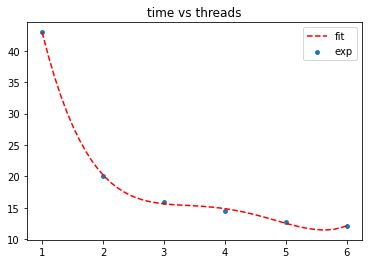

In [8]:
plt.scatter(threads, threads_time, s = 15, label = 'exp')
plt.plot(lin_threads, parallel_fit(lin_threads), '--r', label = 'fit')
plt.title('time vs threads')
plt.legend()

Text(0.5, 1.0, 'thr1 to thrds ratio')

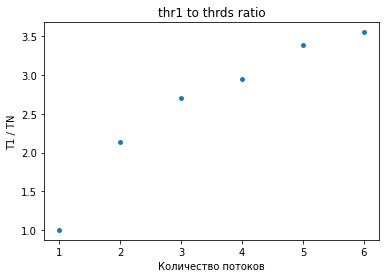

In [12]:
plt.scatter(threads, thr1_to_thr6, s = 15)
plt.xlabel('Количество потоков')
plt.ylabel('T1 / TN')
plt.title('thr1 to thrds ratio')